Fernando Ugucioni Filho. 11802735.

In [11]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import StateSpace,lsim,step
import control as ctl


#verificar unidades
La = 0.82e-3 
Ra = 1.03 #4.8
T = (1/65)*60/(2*np.pi) # 0.072e-3*60/(2*np.pi)=6.8755e-4  em V/(rad/s)#0.0637
J = 831e-7 # 7kgm^2
B = 2e-4 # Mr em Nm

I = np.array([[J, 0], [0, La]]) #[J 0;0 La];
K = np.array([[B, -T], [T, Ra]])#[c -T;T Ra];
invI = np.linalg.inv(I)

A = - np.dot(invI,K)
B = invI
C = np.eye(2)
D = np.zeros((2,2))

sys1 = StateSpace(A,B,C,D)
print(sys1)

StateSpaceContinuous(
array([[   -2.40673887,  1767.89717403],
       [ -179.16128678, -1256.09756098]]),
array([[12033.69434416,     0.        ],
       [    0.        ,  1219.51219512]]),
array([[1., 0.],
       [0., 1.]]),
array([[0., 0.],
       [0., 0.]]),
dt: None
)


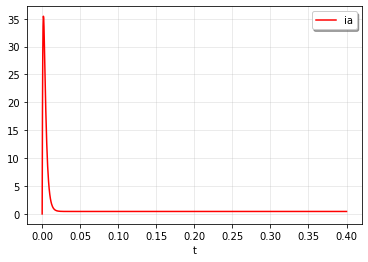

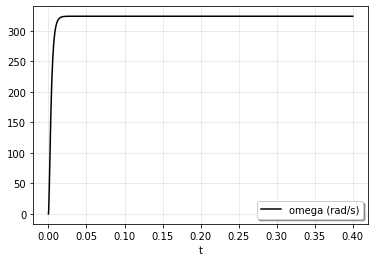

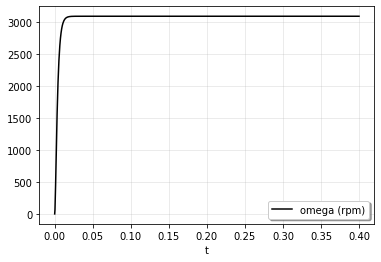

In [13]:
# No-load Current
# Ensaio sem carga Tl=0

tfinal = 1001
t = np.linspace(0, 0.4, tfinal)
Tl = np.linspace(0, 0, tfinal)  
va = np.linspace(48, 48, tfinal)  
ut = Tl, va
u = np.transpose(ut)

tout, yout, xout = lsim(sys1, U=u, T=t)
plt.figure(1)

plt.plot(tout, yout[:,1], 'r', linewidth=1.5, label='ia')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

plt.figure(2)
plt.plot(tout, yout[:,0], 'k', linewidth=1.5, label='omega (rad/s)')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

plt.figure(3)
plt.plot(tout, (60/(2*np.pi))*yout[:,0], 'k', linewidth=1.5, label='omega (rpm)')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()


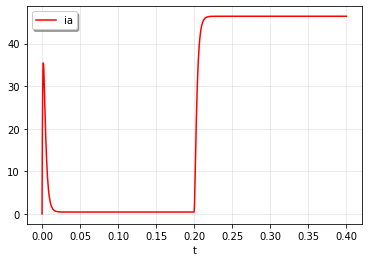

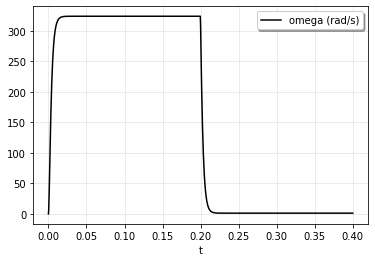

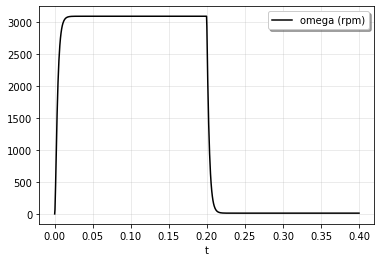

In [14]:
# Stall moment - Torque de stall
# Starting current
# Ensaio com carga Tl=-0.24e-3 que trava o eixo

tfinal = 1001
Tstall = -6820e-3
t = np.linspace(0, 0.4, tfinal)
Tl1 = np.linspace(0, 0, 500)
Tl2  = np.linspace(Tstall, Tstall, 501)
Tl = [*Tl1,*Tl2]
va = np.linspace(48, 48, tfinal)  
ut = Tl, va
u = np.transpose(ut)

tout, yout, xout = lsim(sys1, U=u, T=t)
plt.figure(1)

plt.plot(tout, yout[:,1], 'r', linewidth=1.5, label='ia')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

plt.figure(2)
plt.plot(tout, yout[:,0], 'k', linewidth=1.5, label='omega (rad/s)')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

plt.figure(3)
plt.plot(tout, (60/(2*np.pi))*yout[:,0], 'k', linewidth=1.5, label='omega (rpm)')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

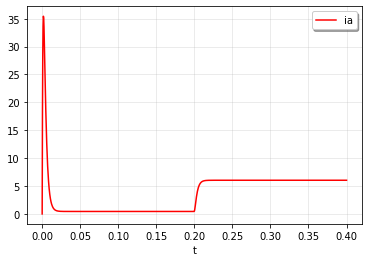

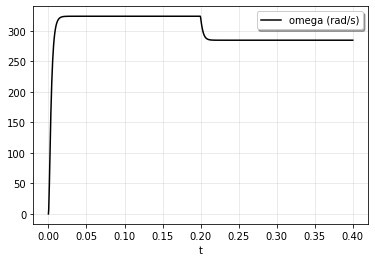

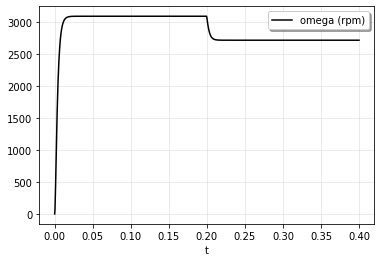

In [15]:
# Stall moment - Torque de stall
# Starting current
# Ensaio com carga Tl=-0.24e-3 que trava o eixo

tfinal = 1001
Tstall = -830e-3
t = np.linspace(0, 0.4, tfinal)
Tl1 = np.linspace(0, 0, 500)
Tl2  = np.linspace(Tstall, Tstall, 501)
Tl = [*Tl1,*Tl2]
va = np.linspace(48, 48, tfinal)  
ut = Tl, va
u = np.transpose(ut)

tout, yout, xout = lsim(sys1, U=u, T=t)
plt.figure(1)

plt.plot(tout, yout[:,1], 'r', linewidth=1.5, label='ia')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

plt.figure(2)
plt.plot(tout, yout[:,0], 'k', linewidth=1.5, label='omega (rad/s)')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

plt.figure(3)
plt.plot(tout, (60/(2*np.pi))*yout[:,0], 'k', linewidth=1.5, label='omega (rpm)')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

A mudança de direção de um motor DC é realizada por uma ponte H, enquanto a velocidade é alterada pelo sinal PWM.
Atualmente, para se alterar a direção e a velocidade de um motor DC, são utilizados CIs que possuem Ponte H e PWM juntos.